In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = '/Users/liamanderson/Desktop/Instacart Basket Analysis'

In [5]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df.4.10(part1 Q8).pkl'))

In [6]:
df_department = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_departments.pkl'))

In [7]:
total_orders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'total_orders_subset.pkl'))

In [8]:
## merge data sets

merged_data = df.merge(df_department, on='department_id', indicator = True)

In [9]:
merged_data.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,n_dependants,marital_status,income,region,exclusion_flag,age_group,income_group,dependants_flag,department,_merge
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,1,married,49620,midwest,include,senior,low_income,has dependants,snacks,both
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,1,married,49620,midwest,include,senior,low_income,has dependants,snacks,both
2,1,Chocolate Sandwich Cookies,19,5.8,389851,709,2,0,21,6.0,...,2,married,158302,northeast,include,senior,high_income,has dependants,snacks,both
3,1,Chocolate Sandwich Cookies,19,5.8,1701441,777,16,1,7,26.0,...,2,married,57797,west,include,middle_aged,middle_income,has dependants,snacks,both
4,1,Chocolate Sandwich Cookies,19,5.8,1871483,825,3,2,14,30.0,...,3,living with parents and siblings,34171,south,include,young_adult,low_income,has dependants,snacks,both


In [10]:
merged_data.shape

(30959687, 32)

In [11]:
merged_data['_merge'].value_counts(dropna = False)

_merge
both          30959687
left_only            0
right_only           0
Name: count, dtype: int64

In [12]:
merged_data.columns

Index(['product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'loyalty_flag',
       'spending_flag', 'order_frequency_flag', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'marital_status', 'income', 'region',
       'exclusion_flag', 'age_group', 'income_group', 'dependants_flag',
       'department', '_merge'],
      dtype='object')

In [13]:
##export data

merged_data.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'final_merged.pkl'))

In [14]:
## now that the data frames are merged we are able to compare the profiles with region and departments
## First we will compare regions with department

In [15]:
department_loyalty_flag = pd.crosstab(merged_data['department'], merged_data['loyalty_flag'], dropna = False)

In [16]:
department_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1829377,749157,2593771
deli,324046,158335,521453


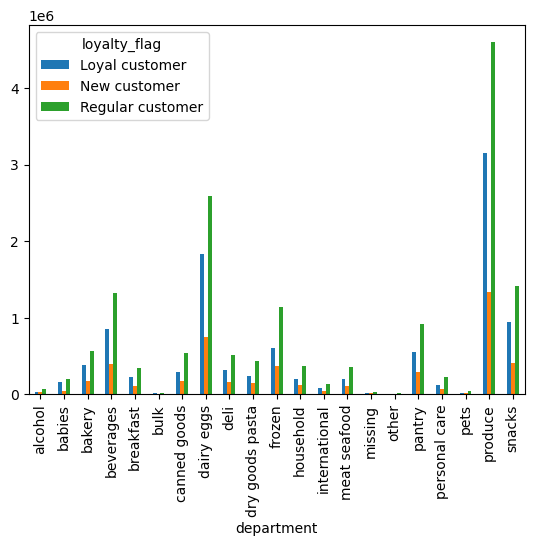

In [17]:
## create a bar chart for the data to better be able to analyze it

bar_department_loyalty_flag = department_loyalty_flag.plot.bar()

In [18]:
## This shows that regular customers seem to buy more of every item then loyal and new customers.

In [19]:
## compare region with age group

region_age_group = pd.crosstab(merged_data['region'], merged_data['age_group'], dropna = False)

In [20]:
region_age_group

age_group,middle_aged,senior,young_adult
region,,,
midwest,2322691,2455033,2482582
northeast,1708439,1883933,1871510
south,3180947,3520930,3607565
west,2511313,2712961,2701783


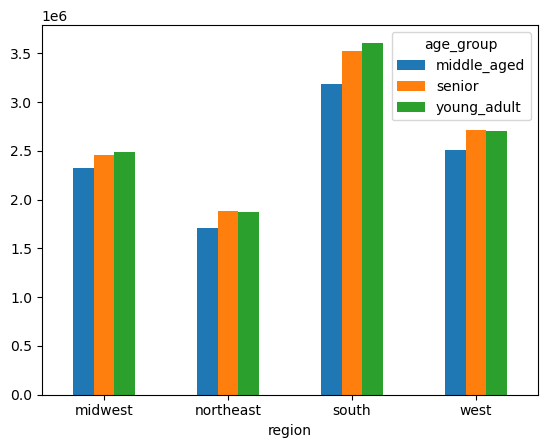

In [21]:
bar_region_age_group = region_age_group.plot.bar(rot=0)

In [22]:
## this shows that middle aged are usually lower then the other age groups. Also south has more counts then the other regions

In [23]:
## compare income group with region

region_income_group = pd.crosstab(merged_data['region'], merged_data['income_group'], dropna = False)

In [24]:
region_income_group

income_group,high_income,low_income,middle_income
region,,,
midwest,3398974,783764,3077568
northeast,2515715,587137,2361030
south,4662331,1142572,4504539
west,3625768,849081,3451208


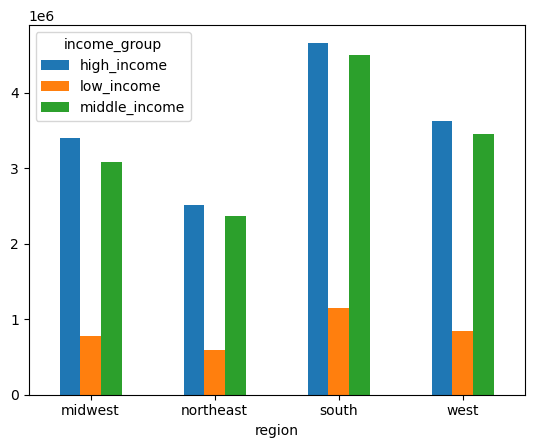

In [25]:
bar_region_income_group = region_income_group.plot.bar(rot=0)

In [26]:
## this graph gives information about income groups within the different regions

In [27]:
## export all of the visualizations

bar_department_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_loyalty_flag.png'))

In [28]:
bar_region_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_age_group.png'))

In [29]:
bar_region_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income_group.png'))